In [1]:
# import delle librerie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# pytorch
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [4]:
# Read the DataFrame from a CSV file
df = pd.read_csv("/content/filename_2.csv")
df = df.fillna(0)
# si binarizza il problema considerando solo la distinzione tra quark leggeri e pesanti
df.loc[df['flavor'] == 4, 'flavor'] = 0
df.loc[df['flavor'] == 5, 'flavor'] = 1 # ho messo le labels 0,4,5 ---> 0,0,1
# Drop a specific column
column_to_exclude = 'flavor'
df_train_test = df.drop(column_to_exclude, axis=1)
feat_cols = df_train_test.columns
df

,jet_pt,jet_eta,flavor,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
0,47.8712,1.893250,1,21.176500,8.365860,29.026900,4.149000,5.0,2.686240e-11,0.059397,0.060374,32.8902,3.0,7.0,0.162448,1.594080,0.862678
1,34.9703,0.609755,1,5.007700,3.035830,2.007540,0.329921,3.0,1.762730e-05,0.066609,0.149812,25.1935,1.0,3.0,0.122343,2.239620,0.930327
2,26.5706,-0.530268,1,0.807884,0.630565,1.044520,1.283360,0.0,4.808580e-02,0.097381,0.113961,-1.0000,-1.0,-1.0,1.000000,-1.000000,-1.000000
3,36.9246,-2.074420,1,16.561700,10.357000,17.516600,30.499200,4.0,4.353190e-10,0.162495,0.115695,73.6335,1.0,2.0,0.259107,0.755648,0.594634
4,28.9667,1.512090,1,18.032500,16.144500,3.293590,9.003470,4.0,3.314360e-11,0.088521,0.093888,293.7900,1.0,4.0,0.087132,1.400080,1.000140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,35.1177,0.252782,1,2.112390,1.332850,0.441166,0.217754,2.0,8.125190e-04,0.115231,0.125688,11.3646,1.0,2.0,1.058650,1.409550,0.463417
1999996,34.8303,-0.808358,1,0.824012,0.416280,1.377850,0.760603,0.0,4.774590e-02,0.066126,0.025138,-1.0000,-1.0,-1.0,1.000000,-1.000000,-1.000000
1999997,29.4848,-0.840796,1,1.450840,1.252500,0.770663,1.968150,1.0,6.777230e-04,0.050063,0.131098,19.5591,1.0,2.0,0.210880,0.983754,0.579169
1999998,25.7466,-0.865773,1,3.997710,-1.000000,1.216380,-1.000000,2.0,6.869750e-05,0.044935,0.064068,16.9286,1.0,2.0,0.089523,0.888597,0.955825


In [5]:
# Si vuole visualizzare come è la percentuale di labels 0 e 1 per vedere se il dataset è bilanciato
counts = df['flavor'].value_counts()

count_of_ones = counts.get(1, 0)  # Get the count for '1', default to 0 if not found
count_of_zeros = counts.get(0, 0)  # Get the count for '1', default to 0 if not found
sum = count_of_zeros + count_of_ones

print('precentage of 1 label:', count_of_ones/sum*100,'percentage of 0 label:',count_of_zeros/sum*100 ),

precentage of 1 label: 91.4375 percentage of 0 label: 8.5625


(None,)

Il dataset risulta molto sbilanciato avendo solo un

In [6]:
column_name = 'track_3_z0_significance'
df_train_test[column_name] = df_train_test[column_name].replace('-', 0) # eventuali elementi NaN rimpiazzati con 0


In [7]:
non_numeric_columns = df.select_dtypes(include='object').columns
column_name = 'track_3_z0_significance'
unique_strings = df_train_test[column_name].unique()
print(unique_strings)

[4.149    0.329921 1.28336  ... 3.00872  0.968628 8.2088  ]


In [8]:
from sklearn.preprocessing import StandardScaler
# rinormalizzazione delle features

# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected columns
df_train_test= scaler.fit_transform(df_train_test)


In [9]:
unique_values = df['flavor'].unique()
print(unique_values)

[1 0]


In [10]:
# splitting del campione in training, validation e test (60:20:20)

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

X_train, X_test, Y_train, Y_test = train_test_split(df_train_test[0:100000],df[0:100000]['flavor'],test_size=0.2,shuffle=True)
X_vali,X_test, Y_vali, Y_test = train_test_split(X_test,Y_test,test_size=0.5,shuffle=True)



print(X_train.shape)
print(Y_train.shape)
print(X_vali.shape)
print(Y_vali.shape)
print(X_test.shape)
print(Y_test.shape)

# Create an instance of RandomOverSampler
#oversampler = RandomOverSampler(random_state=42)

# Resample the data, si potrebbe utilizzare per ovviare al problema del downsampling della classe 0
#X_train, Y_train = oversampler.fit_resample(X_train, Y_train)
#X_test, Y_test = oversampler.fit_resample(X_test, Y_test)
#X_vali, Y_vali = oversampler.fit_resample(X_vali, Y_vali)

print(X_train.shape)
print(Y_train.shape)
print(X_vali.shape)
print(Y_vali.shape)
print(X_test.shape)
print(Y_test.shape)

(80000, 16)
(80000,)
(10000, 16)
(10000,)
(10000, 16)
(10000,)
(80000, 16)
(80000,)
(10000, 16)
(10000,)
(10000, 16)
(10000,)


In [11]:
pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
counter = 0.
for i,y in enumerate(Y_train):
  if y==0:
      counter += 1
print(counter/len(Y_train))

0.0865875


In [13]:
# conversione in tensori torch dei vettori numpy, così da sfruttare l'accelerazione della gpu
import torch
import numpy as np

X_train_pt = torch.Tensor(np.array(X_train)).float()
Y_train_pt = torch.Tensor(np.array(Y_train)).int()
X_test_pt = torch.Tensor(np.array(X_test)).float()
Y_test_pt = torch.Tensor(np.array(Y_test)).int()

X_vali_pt = torch.Tensor(np.array(X_vali)).float()
Y_vali_pt = torch.Tensor(np.array(Y_vali)).int()

print(X_train_pt.shape)
print(Y_train_pt.shape)
print(X_vali_pt.shape)
print(Y_vali_pt.shape)
print(X_test_pt.shape)
print(Y_test_pt.shape)

torch.Size([80000, 16])
torch.Size([80000])
torch.Size([10000, 16])
torch.Size([10000])
torch.Size([10000, 16])
torch.Size([10000])


In [14]:
# controlliamo se la GPU è disponibile e nel caso quale tipo di GPU
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Numero di GPU disponibili:  1
Tesla T4
Computation device: cuda



In [15]:
from torch.utils.data import TensorDataset, DataLoader

batch = 100

dataset_train = TensorDataset(X_train_pt, Y_train_pt)
train_dl = DataLoader(dataset_train, batch_size=batch, shuffle=True, num_workers=1,drop_last=True)
# se i batch non dividono esattamente il dataset, uno può avere dimensione diversa in questo caso si droppa con drop_last

dataset_vali = TensorDataset(X_vali_pt, Y_vali_pt)
vali_dl = DataLoader(dataset_vali, batch_size=batch, shuffle=True, num_workers=1,drop_last=True)

dataset_test = TensorDataset(X_test_pt, Y_test_pt)
test_dl = DataLoader(dataset_test, batch_size=batch, shuffle=True, num_workers=1,drop_last=True)

Definizione del modello

In [16]:
from torch import nn
import torch.nn.functional as F
import torch.nn.init as init

class DNN(nn.Module):
  def __init__(self, input_dim=16, output_dim=1, hidden_dim=32, hidden_dim1=64, hidden_dim2=128, hidden_dim3=256, hidden_dim4=512):
    super(DNN, self).__init__()

    #Strati
    self.layer1 = nn.Linear(input_dim, hidden_dim1)
    self.layer2 = nn.Linear(hidden_dim1, hidden_dim2)
    self.layer3 = nn.Linear(hidden_dim2, hidden_dim3)
    self.layer4 = nn.Linear(hidden_dim3, hidden_dim4)
    self.layer5 = nn.Linear(hidden_dim4, hidden_dim3)
    self.layer6 = nn.Linear(hidden_dim3, hidden_dim2)
    self.layer7 = nn.Linear(hidden_dim2, hidden_dim1)
    self.layer8 = nn.Linear(hidden_dim1, hidden_dim)
    self.layer_out = nn.Linear(hidden_dim, output_dim)


    #Attivazione
    self.activ = nn.ReLU()
    self.dropout1 = nn.Dropout(0.1)
    self.dropout2 = nn.Dropout(0.25)
    self.dropout3 = nn.Dropout(0.5)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):

    x = self.layer1(x)
    x = self.activ(x)

    x = self.layer2(x)
    x = self.activ(x)

    x = self.layer3(x)
    x = self.activ(x)
    x = self.dropout3(x)

    x = self.layer4(x)
    x = self.activ(x)

    x = self.layer5(x)
    x = self.activ(x)
    x = self.dropout1(x)

    x = self.layer6(x)
    x = self.activ(x)

    x = self.layer7(x)
    x = self.activ(x)
    x = self.dropout2(x)

    x = self.layer8(x)
    x = self.activ(x)

    x = self.layer_out(x)

    out = self.sigmoid(x)
    return out

class DNN_less(nn.Module):
  def __init__(self, input_dim=16, output_dim=1, hidden_dim=16, hidden_dim1=32, hidden_dim2=64):
    super(DNN_less, self).__init__()

    #Strati
    self.layer1 = nn.Linear(input_dim, hidden_dim1)
    self.layer2 = nn.Linear(hidden_dim1, hidden_dim2)
    self.layer3 = nn.Linear(hidden_dim2, hidden_dim1)
    self.layer4 = nn.Linear(hidden_dim1, hidden_dim)
    self.layer_out = nn.Linear(hidden_dim, output_dim)


    #Attivazione
    self.activ = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dropout2 = nn.Dropout(0.25)
    self.dropout3 = nn.Dropout(0.5)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):

    x = self.layer1(x)
    x = self.activ(x)
    x = self.dropout1(x)

    x = self.layer2(x)
    x = self.activ(x)
    x = self.dropout2(x)

    x = self.layer3(x)
    x = self.activ(x)
    x = self.dropout3(x)

    x = self.layer4(x)
    x = self.activ(x)

    x = self.layer_out(x)

    out = self.sigmoid(x)
    return out



In [17]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# printout del modello

model = DNN()
print(model)

from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,16))
else:
  summary(model, input_size=(1,16))

DNN(
  (layer1): Linear(in_features=16, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=256, bias=True)
  (layer4): Linear(in_features=256, out_features=512, bias=True)
  (layer5): Linear(in_features=512, out_features=256, bias=True)
  (layer6): Linear(in_features=256, out_features=128, bias=True)
  (layer7): Linear(in_features=128, out_features=64, bias=True)
  (layer8): Linear(in_features=64, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (activ): ReLU()
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (sigmoid): Sigmoid()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]           1,088
              ReLU-2                [-1, 1, 64]

In [19]:
feats, labels = next(iter(train_dl))

model.to(device)
feats = feats.to(device)
labels = labels.to(device)
out = model(feats)

print('input della rete neurale: ', feats.shape)
print('output della rete neurale: ', out.shape)
print(out[0])


input della rete neurale:  torch.Size([100, 16])
output della rete neurale:  torch.Size([100, 1])
tensor([0.4689], device='cuda:0', grad_fn=<SelectBackward0>)


In [20]:
# Per completare il modello dobbiamo definire la loss function, le eventuali metriche per monitorare il
# training della rete, e infine l'ottimizzatore

# loss function
criterion = nn.BCELoss()
# loss_func = nn.NLLLoss() #alteranativamente con log_softmax (stesso risultato)

# ottmizzatore: usiamo per esempio la discesa stocastica lungo il gradiente con momentum
from torch import optim
lr = 0.001
opt = torch.optim.Adam(model.parameters(), lr=lr)

In [21]:
%pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
class SaveBestModel:
    def __init__(self, best_valid_loss=float('inf')): #object initialized with best_loss = +infinite
        self.best_valid_loss = best_valid_loss

    def __call__(
        self, current_valid_loss,
        epoch, model, optimizer, criterion, metric,
    ):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss

            print(f"\nBest validation loss: {self.best_valid_loss}")
            print(f"\nSaving best model for epoch: {epoch+1}\n")

            # method to save a model (the state_dict: a python dictionary object that
            # maps each layer to its parameter tensor) and other useful parametrers
            # see: https://pytorch.org/tutorials/beginner/saving_loading_models.html

            torch.save({'model' : model,
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                'metric': metric,
                }, 'best_model.pt')

In [38]:
from sklearn.metrics import roc_auc_score

def train(model, train_loader, criterion, optimizer):
    model.to(device)
    criterion.to(device)
    model.train()
    train_loss = 0.0
    total_correct = 0
    total_samples = 0

    y_true = []
    y_scores = []

    for inputs, labels in train_loader:
        inputs = inputs.to(device)  # Move inputs to device
        labels = labels.to(device)  # Move labels to device
        optimizer.zero_grad()
        outputs = model(inputs)
        predicted_probs = outputs.squeeze().tolist()
        loss = criterion(outputs.view(-1), labels.type(torch.FloatTensor).to(device))  # Move labels to device
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        predicted_labels = (outputs > 0.5).float()
        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)
        y_true.extend(labels.tolist())
        y_scores.extend(predicted_probs)

    avg_loss = train_loss / total_samples
    accuracy = total_correct / total_samples
    auc = roc_auc_score(y_true, y_scores)

    return avg_loss, accuracy, auc

# Si definisce il validation loop
def validate(model, val_loader, criterion):
    model.to(device)
    criterion.to(device)
    model.eval()
    val_loss = 0.0
    total_correct = 0
    total_samples = 0

    y_true = []
    y_scores = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)  # Move inputs to device
            labels = labels.to(device)  # Move labels to device
            outputs = model(inputs)
            predicted_probs = outputs.squeeze().tolist()
            loss = criterion(outputs.view(-1), labels.type(torch.FloatTensor).to(device))

            val_loss += loss.item() * inputs.size(0)
            predicted_labels = (outputs > 0.5).float()
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)
            y_true.extend(labels.tolist())
            y_scores.extend(predicted_probs)

    avg_loss = val_loss / total_samples
    accuracy = total_correct / total_samples
    auc = roc_auc_score(y_true, y_scores)

    return avg_loss, accuracy, auc


In [43]:
num_epochs = 20

save_best_model = SaveBestModel()

import time

scheduler = optim.lr_scheduler.StepLR(opt, step_size = 5, gamma=0.1, last_epoch=-1, verbose=True)

hist_loss = []
hist_metric = []
hist_vloss = []
hist_vmetric = []

for epoch in range(num_epochs):

    t0 = time.time()

    train_loss, train_accuracy, tauc = train(model, train_dl, criterion, opt)

    hist_loss.append(train_loss)
    hist_metric.append(tauc)

    val_loss, val_accuracy, vauc = validate(model, vali_dl, criterion)

    hist_vloss.append(val_loss)
    hist_vmetric.append(vauc)
    #save best model
    save_best_model(val_loss, epoch, model, opt, criterion, vauc)

    elapsed_time = time.time()-t0
    print("epoch: %d, time(s): %.4f, train loss: %.6f, train metric: %.6f, train_auc: %.6f, vali loss: %.6f, vali metric: %.6f, vali_auc: %.6f "
          % (epoch+1, elapsed_time, train_loss, train_accuracy, tauc, val_loss, val_accuracy, vauc))
 # update learning rate schedule
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-03.

Best validation loss: 0.1931424170732498

Saving best model for epoch: 1

epoch: 1, time(s): 4.8984, train loss: 0.189558, train metric: 91.341250, train_auc: 0.907216, vali loss: 0.193142, vali metric: 91.420000, vali_auc: 0.901855 
Adjusting learning rate of group 0 to 1.0000e-03.

Best validation loss: 0.19196422785520553

Saving best model for epoch: 2

epoch: 2, time(s): 5.3703, train loss: 0.188466, train metric: 91.341250, train_auc: 0.909062, vali loss: 0.191964, vali metric: 91.420000, vali_auc: 0.902984 
Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 3, time(s): 4.7378, train loss: 0.187298, train metric: 91.298375, train_auc: 0.910507, vali loss: 0.194572, vali metric: 91.394200, vali_auc: 0.903698 
Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 4, time(s): 4.6230, train loss: 0.186293, train metric: 91.131800, train_auc: 0.911889, vali loss: 0.194414, vali metric: 90.669600, vali_auc: 0.903466 
Adjusting

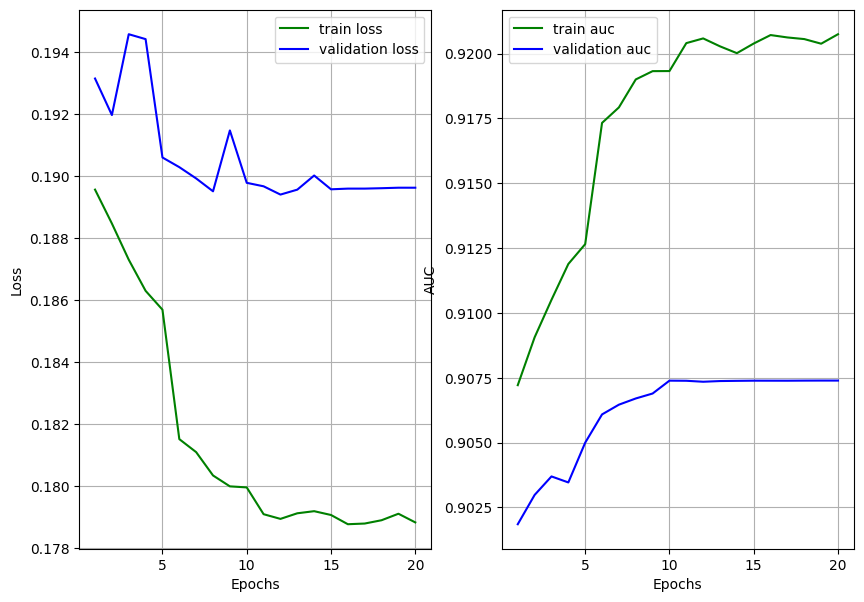

In [44]:
# grafico monitoring training
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.plot(range(1,len(hist_loss)+1), hist_loss, color='green', linestyle='-', label='train loss')
plt.grid()
plt.plot(range(1,len(hist_vloss)+1), hist_vloss, color='blue', linestyle='-', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(hist_metric)+1),hist_metric, color='green', linestyle='-', label='train auc')
plt.grid()
plt.plot(range(1,len(hist_vmetric)+1),hist_vmetric, color='blue', linestyle='-', label='validation auc')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

<ipython-input-46-e43621119377>:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')  # Diagonal line representing the random classifier


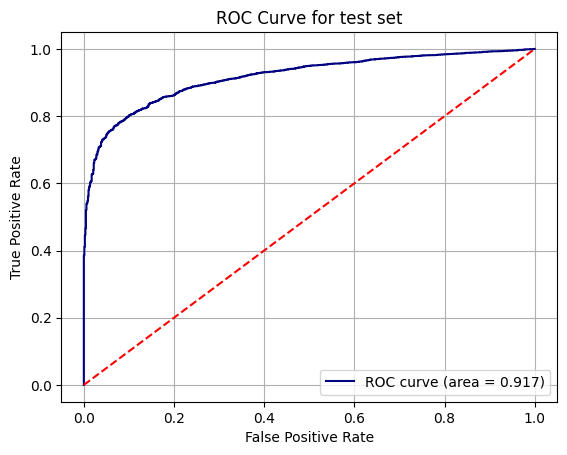

In [46]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def test(model, test_loader):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            predicted_probs = outputs.squeeze().tolist()

            y_true.extend(labels.tolist())
            y_scores.extend(predicted_probs)

    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    return fpr, tpr, auc

test_fpr, test_tpr, test_auc = test(model, test_dl)

# Plot the ROC curve
plt.plot(test_fpr, test_tpr, label='ROC curve (area = %0.3f)' % test_auc, color='navy')
plt.grid()
plt.plot([0, 1], [0, 1], 'k--', color='red')  # Diagonal line representing the random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc='lower right')
plt.show()


[0]	Validation-auc:0.87058
[1]	Validation-auc:0.88924
[2]	Validation-auc:0.89090
[3]	Validation-auc:0.89150
[4]	Validation-auc:0.89288
[5]	Validation-auc:0.89234
[6]	Validation-auc:0.89334
[7]	Validation-auc:0.89379
[8]	Validation-auc:0.89390
[9]	Validation-auc:0.89485
[10]	Validation-auc:0.89607
[11]	Validation-auc:0.89730
[12]	Validation-auc:0.89963
[13]	Validation-auc:0.90047
[14]	Validation-auc:0.90101
[15]	Validation-auc:0.90161
[16]	Validation-auc:0.90230
[17]	Validation-auc:0.90237
[18]	Validation-auc:0.90276
[19]	Validation-auc:0.90273
[20]	Validation-auc:0.90293
[21]	Validation-auc:0.90330
[22]	Validation-auc:0.90421
[23]	Validation-auc:0.90448
[24]	Validation-auc:0.90443
[25]	Validation-auc:0.90478
[26]	Validation-auc:0.90479
[27]	Validation-auc:0.90550
[28]	Validation-auc:0.90590
[29]	Validation-auc:0.90620
[30]	Validation-auc:0.90644
[31]	Validation-auc:0.90675
[32]	Validation-auc:0.90693
[33]	Validation-auc:0.90734
[34]	Validation-auc:0.90756
[35]	Validation-auc:0.90778
[3

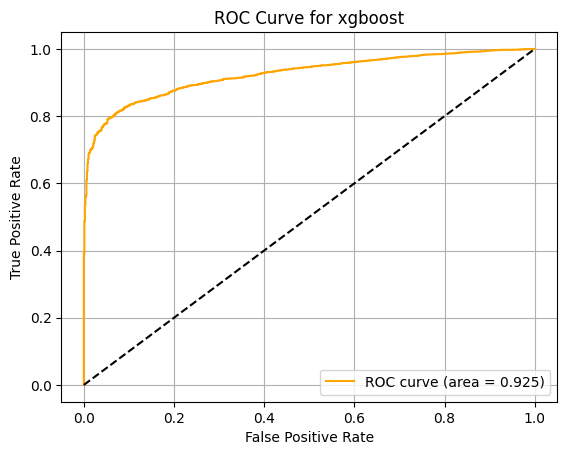

In [49]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Crea DMatrix per XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvali = xgb.DMatrix(X_vali, label=Y_vali)
dtest = xgb.DMatrix(X_test, label=Y_test)

# inizializza i parametri per xgboost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=150, evals=[(dvali, 'Validation')], early_stopping_rounds=200)

y_pred = model.predict(dtest)

# Calcolo il false positive rate (FPR), true positive rate (TPR), ethresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# Calcolo AUC del ROC plot
auc = roc_auc_score(Y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc, color='orange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing the random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for xgboost')
plt.legend(loc='lower right')
plt.grid()
plt.show()